<a href="https://colab.research.google.com/github/Valerius-ufv/python_bootcamp_DV/blob/main/DS_Notebook_07_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos con Seaborn
Seaborn es una libreria de visualizacíon en Python que trabaja sobre Matplotlib. Esta libreria nos permite generar gráficos a partir de DataFrames de Pandas de manera muy cómoda y accesible.

Antes de empezar a trabajar vamos a importar las librerias que ya conocemos de antes, y ahora sumaremos Seaborn, la cual se suele importar con el nombre `sns`. Además, se suele acompañar de la instrucción `sns.set()` que sirve para darle un estilo particular a los gráficos, como veremos en breve.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

Seaborn ya viene con algunos datasets incorporados. Puedes ver cuáles con la siguiente instrucción:

In [30]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Vamos a usar el dataset Iris, que ya conocemos. Para cargarlo, simplemente hacemos:

In [26]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Notar que ya lo carga en un Data Frame de Pandas.  Veamos qué podemos hacer con Seaborn para visualizar de forma eficiente este dataset.

## 1. Diagramas de dispersión e histogramas con Seaborn.

Una instrucción muy cómoda para hacer una primera inspección de un dataset es `sns.pairplot()`. Hay que tener cuidado con esta función cuando el dataset tiene muchas instancias o columnas.

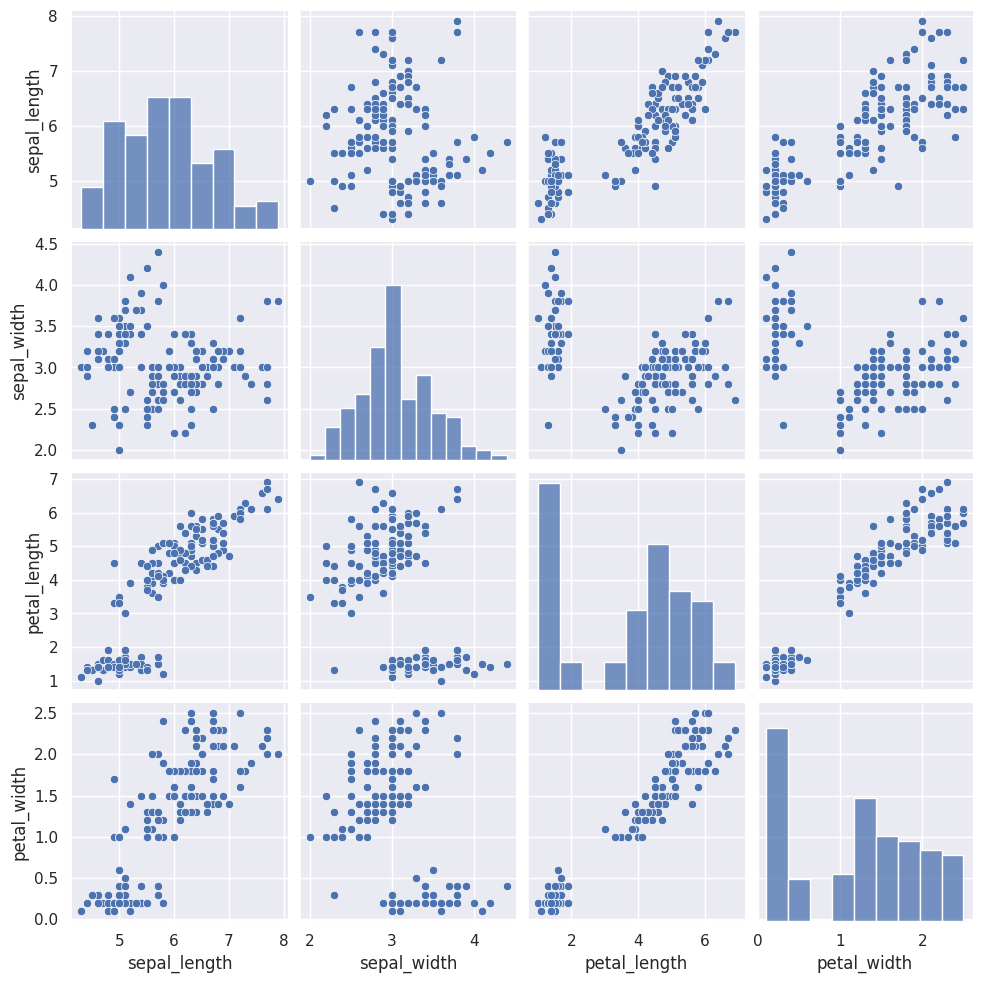

In [35]:
sns.pairplot(data)

En este caso, lo que hicimos al utilizar el gráfico "pair plot" de Seaborn fue llevar a cabo una visualización efectiva de las relaciones bivariadas y distribuciones univariadas de todas las combinaciones posibles de características de la flor "Iris".
Desde mi punto de vista, describiría este gráfico como una herramienta indispensable para la comparación de características entre los diferentes tipos de flores "Iris" que podría llegar a ver (Setosa, Virginica y Versicolor)

¿Ves lo que hizo?¿Cómo describirías este gráfico? Recuerda siempre consultar la documentación.

Este grafico se puede mejorar, pasándole el argumento `hue` a la función:

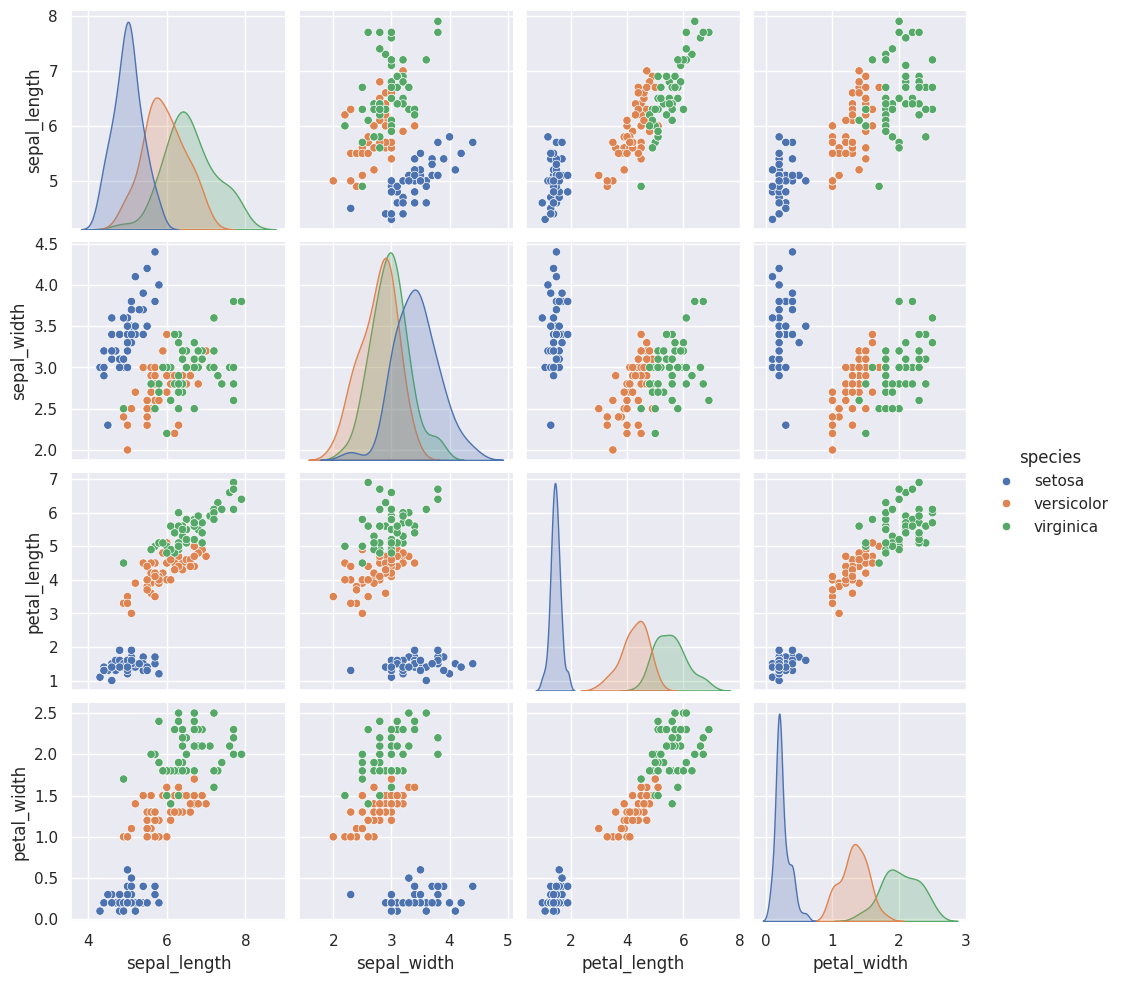

In [36]:
sns.pairplot(data, hue = 'species')

En mi opinión, tal y como ya mencioné en apartados anteriores, llega a ser un gráfico muy útil e interesante para la comparación de variables.
Si lo hiciéramos estaríamos activando por defecto el estilo visual de Seaborn para todas y cada una de las gráficas del notebook, sobre todo la apariencia de todos y cada uno de ellos con colores más suaves y estéticos.

Éste debe ser unos de los gráficos más famosos en ciencia de datos. ¿Te parece útil?¿Por qué?

Vuelve a correr las instrucciones, pero descomentando la instrucción `sns.set()` al comienzo del código. ¿Qué cambió?

A continuación, veamos cómo generar cada componente de este gráfico de forma independiente.

### 1.1 Scatterplot

Hacer un diagrama de dispersión con Seaborn es sencillo:

<Axes: xlabel='petal_length', ylabel='petal_width'>

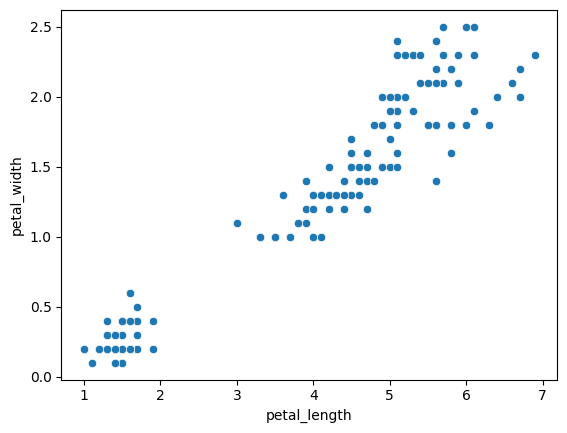

In [6]:
sns.scatterplot(x="petal_length", y="petal_width", data=data)

Y, si le pasamos la especie en el argumento `hue`, el gráfico mejora sustancialmente:

<Axes: xlabel='petal_length', ylabel='petal_width'>

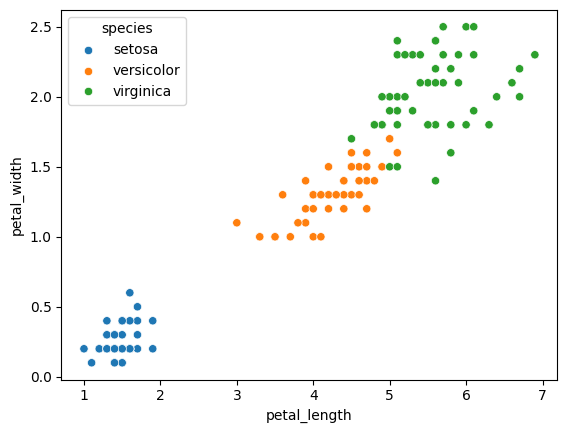

In [8]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species" , data=data)

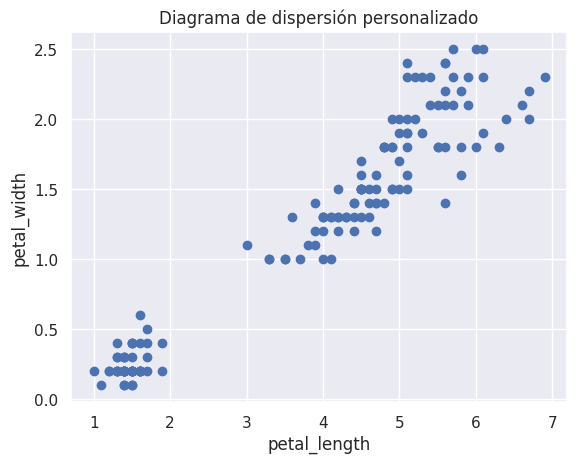

In [39]:
import matplotlib.pyplot as plt

# Datos
x = "petal_length"
y = "petal_width"

# Crear el diagrama de dispersión
plt.scatter(x, y, data=data)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.title("Diagrama de dispersión personalizado")
plt.show()

**Ejercicio:** intenta hacer este mismo gráfico con Matplotlib.

### 1.2 Histogramas

Los histogramas en Seaborn son un poco más versátiles que los de Matplotlib. Veamos cómo:

<ipython-input-41-d8b90fe6a2ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['petal_length'], bins = 20)


<Axes: xlabel='petal_length', ylabel='Density'>

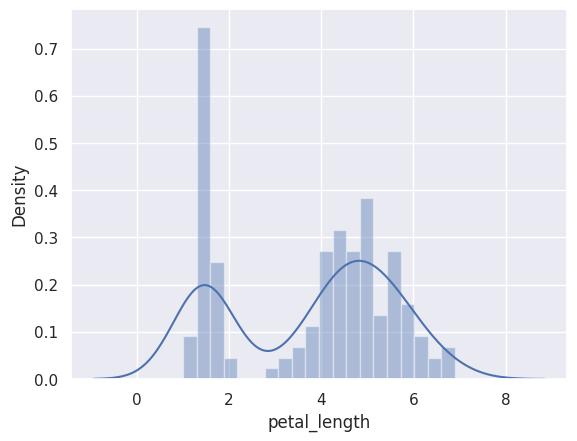

In [41]:
sns.distplot(data['petal_length'], bins = 20)

In [ ]:
sns.distplot(data['petal_length'], bins = 20, hist = True, kde = False, rug = False, color = 'b')

**Ejercicio:** Modificar los siguientes argumentos de la función `distplot` y observar qué hacen: `hist`,`kde` (prestar atención a la escala en el eje *y*) y `rug`.

Otra tipo de visualización que combina ambas opciones es `jointplot`:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2219: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


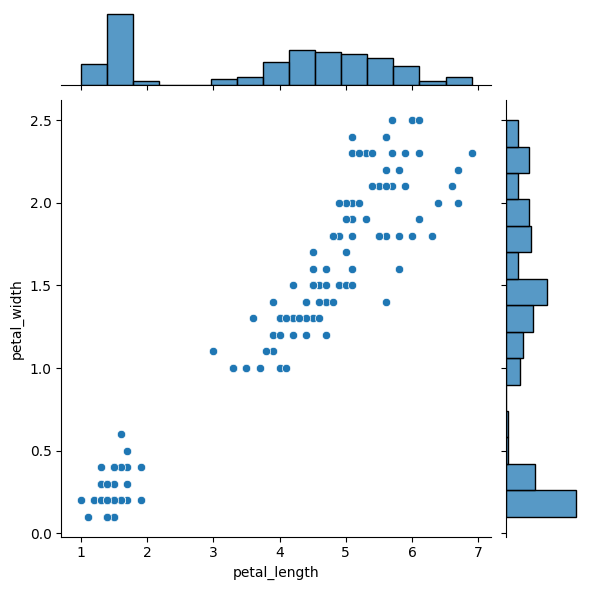

In [11]:
sns.jointplot(x="petal_length", y="petal_width", marginal_kws=dict(bins=15, rug=True), data=data)

Esperamos con estos primeros ejemplos haberlos convencido que el uso de Seaborn facilita la visualización de datos provienentes de un DataFrame respecto a la utilización de (solo) Matplotlib. A continuación vamos a explorar otras funciones de visualización que nos ofrece esta libreria.

## 2. Categorical Plots

Como su nombre lo indica, los categorical plots son gráficos donde una de las variables a graficar es de tipo categórica. Este tipo de gráficos son muy usados en Data Science y Seaborn tiene algunas funciones especiales dedicada a ellos.

Una función útil para contar las diferentes etiquetas de una variable categórica es `countplot`:

<Axes: xlabel='species', ylabel='count'>

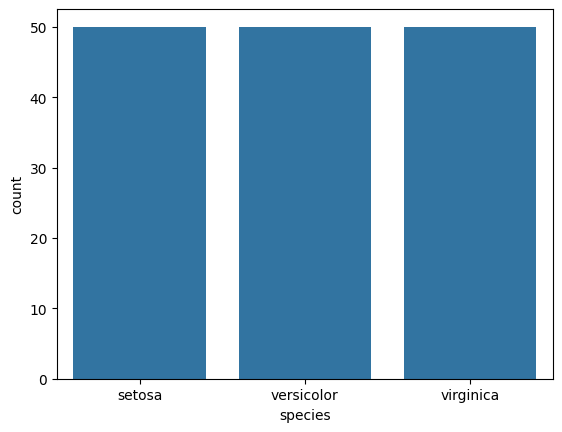

In [12]:
sns.countplot(data = data, x = "species")

Así, obtenemos tres barras de altura 50, una por especie, representando la cantidad de instancias que hay en el dataset de cada una.

Muchas veces queremos graficar una variable numérica en función de una variable categórica. Por ejemplo, el ancho del pétalo según la especie. Veamos cómo realizar un grafico de este tipo en Matplotlib:

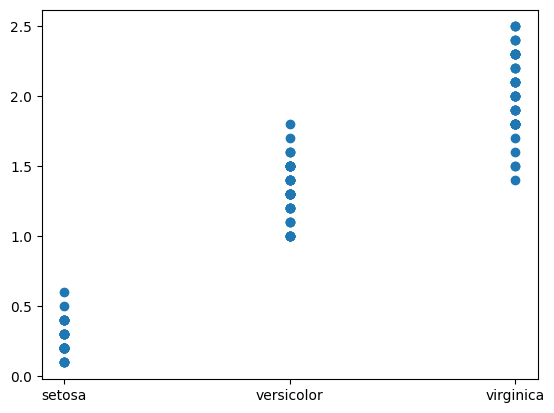

In [13]:
especie = data['species']
ancho_petalo = data['petal_width']
plt.scatter(especie,ancho_petalo)

Como podemos observar el resultado no es muy satisfactorio. Al estar todos los puntos sobre una misma linea, no se pueden distinguir entre sí.

Veamos ahora cómo realizar el mismo gráfico son Seaborn, usando la función `catplot`:

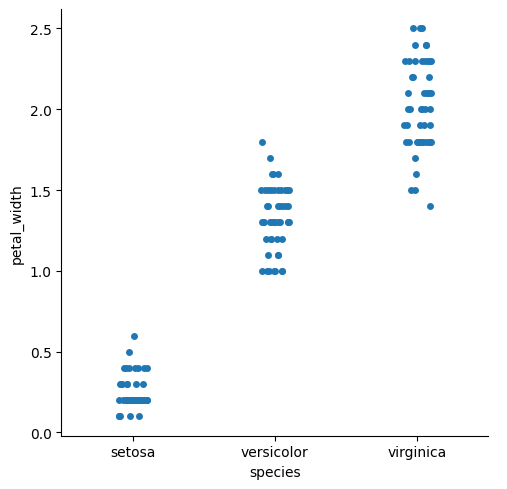

In [14]:
sns.catplot(data = data, x = "species", y = "petal_width")

Como se puede observar, Seaborn le da automáticamente distintos colores a las categorías y además los separa para poder identificar la cantidad de puntos en cada grupo con facilidad.

**Ejercicio - Challenge**:

1. Realizar con Seaborn un gráfico del largo del pétalo según la especie.
1. Realizar el mismo gráfico, pero ahora como gráfico de barras. **Pista**: ver el parametro `kind` de la función `catplot` o la función `barplot`.
1. ¿Que representan las barritas negras?
1. Averiguar la utilidad de los parámetros `ci` y `estimator`.

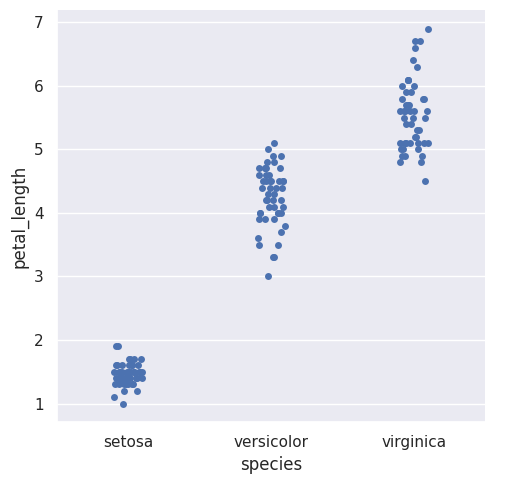

In [42]:
sns.catplot(data = data, x = "species", y = "petal_length")

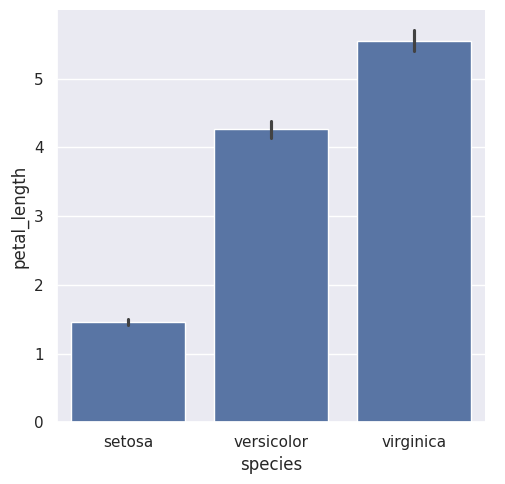

In [43]:
sns.catplot(data = data, x = "species", y = "petal_length", kind = "bar")

<ipython-input-44-ec383e8cddb3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data = data, x = "species", y = "petal_length", kind = "bar", ci = None, estimator = np.median)


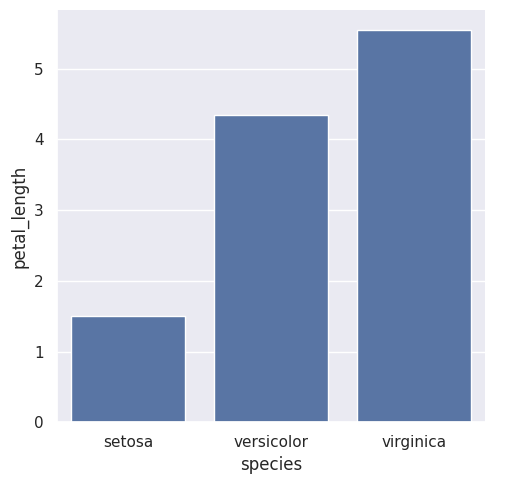

In [44]:
sns.catplot(data = data, x = "species", y = "petal_length", kind = "bar", ci = None, estimator = np.median)

Por un lado, el parámetro "ci" nos permitirá controlar si de verdad deseamos o no que se muestren los intervalos y el nivel de confianza de los intervalos alrededor de las estimaciones llevadas a cabo en nuestro archivo "Iris.csv".

Por otro lado, el parámetro "estimator" nos permitirá definir una función que nos servirá para calcular las métricas representadas en el gráfico. Por defecto, al utilizar un estimador de este tipo, el gráfico nos devolverá la media de los valores en cada categoria.

### 3. Diagrama de Cajas

Generar diagramas de cajas es muy sencillo. Podemos generar el diagrama de una columna de la siguiente manera:

<Axes: ylabel='petal_width'>

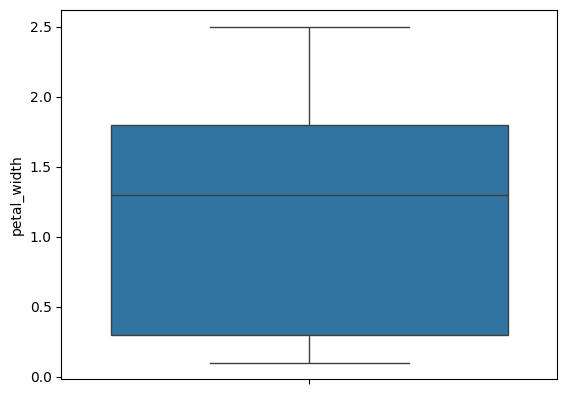

In [15]:
sns.boxplot(data = data, y = "petal_width")
# sns.boxplot(data = data, x = "petal_width")

Pero aporta mucha más información si separamos por especie.

<Axes: xlabel='species', ylabel='petal_width'>

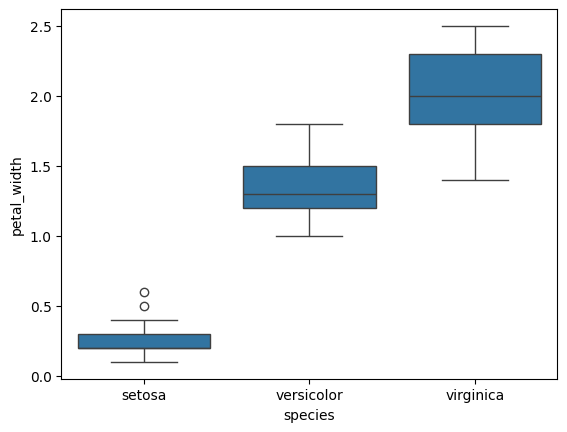

In [16]:
sns.boxplot(data = data, x = 'species', y = "petal_width")

## 4. Heatmaps y correlación

Correr la siguiente celda y googlear: ¿Qué es un heatmap?¿Cómo se hacen en Seaborn?¿Qué hacía la función `corr()` de Pandas?¿Cuáles son sus parámetros?¿Qué hace el parámetro `method`? Interpretar el gráfico obtenido.

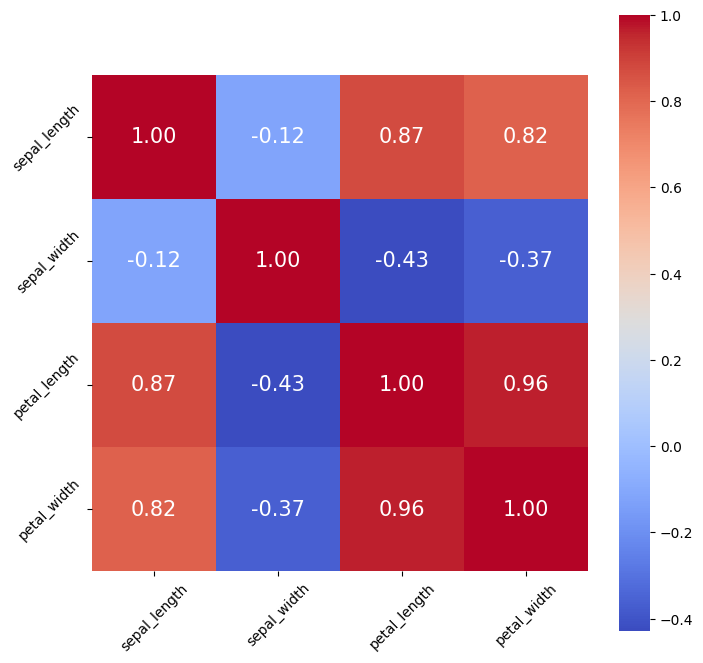

In [17]:
corr = data.drop(columns = 'species').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = 'species').columns,
           yticklabels= data.drop(columns = 'species').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## 5. Combinando con Matplotlib

Como Seaborn corre sobre Matplotlib, se pueden combinar instrucciones de ambas librerías sin problemas. Veamos un ejemplo:

Text(0, 0.5, 'Ancho del pétalo (cm)')

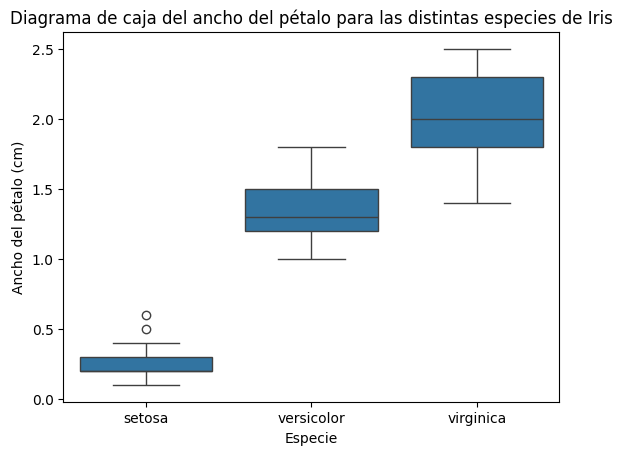

In [18]:
sns.boxplot(data = data, x = 'species', y = "petal_width")
plt.title('Diagrama de caja del ancho del pétalo para las distintas especies de Iris')

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn
plt.xlabel('Especie')
plt.ylabel('Ancho del pétalo (cm)')

## Ejercitación

Elige uno de los datasets disponibles en Seaborn o el dataset de críticas de vinos del encuentro anterior. Aplica las herramientas vistas de Pandas y de Seaborn para obtener una primera aproximación a las características del conjunto de datos elegido.